In [1]:
from functools import partial
import pickle as pkl

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import soepy

from dev_library import plot_basics_choices
from dev_library import plot_basics_wages
from dev_library import df_alignment

In [2]:
fname = os.environ["PROJECT_DIR"] + "/resources/soepcore_struct_prep.dta"
df_obs = pd.read_stata(fname, convert_categoricals = False)
df_obs = df_alignment(df_obs, is_obs=True)

In [3]:
os.chdir("/home/peisenha/structExpectations/development/estimations/basecamp")

In [4]:
model_params_start = pd.read_pickle("start.soepy.pkl")
model_params_start

value     upper    lower  fixed
category      name                                             
const_wage_eq gamma_0s1      2.006523     3.700    1.380  False
              gamma_0s2      2.052223     3.700    1.380  False
              gamma_0s3      2.117786     3.700    1.380  False
exp_returns   gamma_1s1      0.135642     0.500    0.001  False
              gamma_1s2      0.210134     0.500    0.001  False
              gamma_1s3      0.312074     0.500    0.001  False
exp_accm      g_s1           0.136679     0.500    0.001  False
              g_s2           0.247751     0.500    0.001  False
              g_s3           0.251999     0.500    0.001  False
exp_deprec    delta_s1       0.020000     0.200    0.001   True
              delta_s2       0.020000     0.200    0.001   True
              delta_s3       0.020000     0.200    0.001   True
hetrg_unobs   theta_p1      -0.633038    -0.100   -1.000  False
              theta_f1      -0.921103    -0.100   -1.000  False
shares        share_1        0.522798     0.900    0.100  False
sd_wage_shock sigma_1        0.349414     1.000    0.001  False
              sigma_2        0.404907     1.000    0.001  False
disutil_work  no_kids_f      0.429523     2.000    0.001  False
              no_kids_p     -0.418255    -0.001   -1.500  False
              yes_kids_f     1.324608     2.000    0.001  False
              yes_kids_p    -0.396018    -0.001   -1.500  False
              child_02_f     0.105425     0.200    0.001  False
              child_02_p    -0.043021    -0.001   -1.500  False
              child_35_f     0.031437     0.200    0.001  False
              child_35_p    -0.162758    -0.001   -1.500  False
              child_610_f    0.027559     0.200    0.001  False
              child_610_p   -0.357365    -0.001   -1.500  False
benefits_base              200.000000  1000.000  100.000   True
delta                        0.980000     0.990    0.900   True
mu                          -0.560000    -0.990   -0.010   True

In [5]:
df_sim_start = soepy.simulate(model_params_start, "resources/model_spec_init.yml")
df_sim_start = df_alignment(df_sim_start)

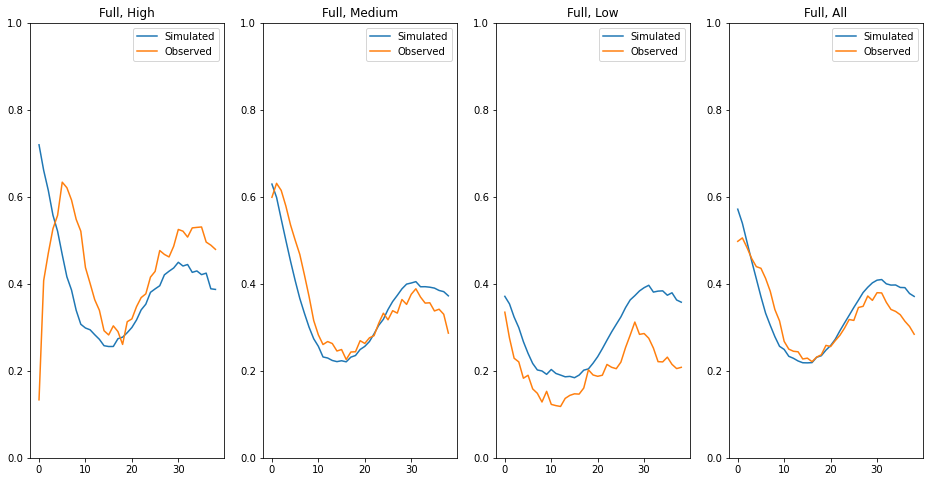

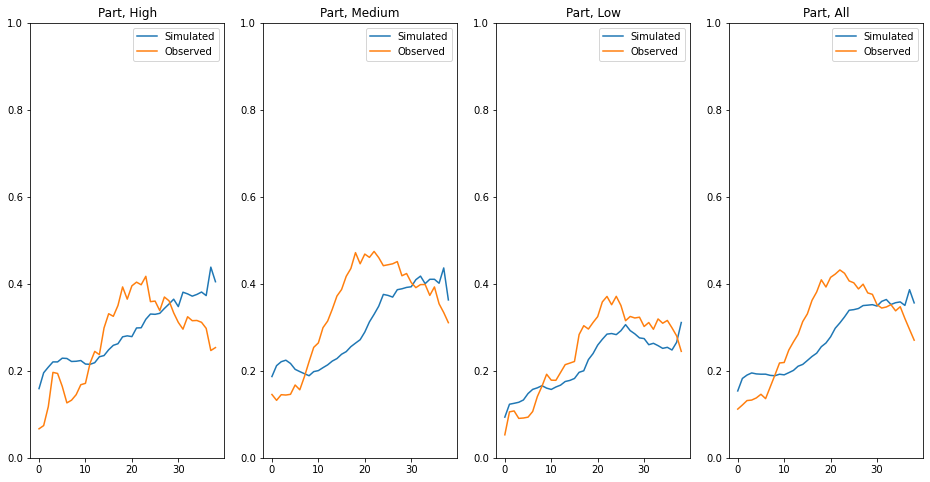

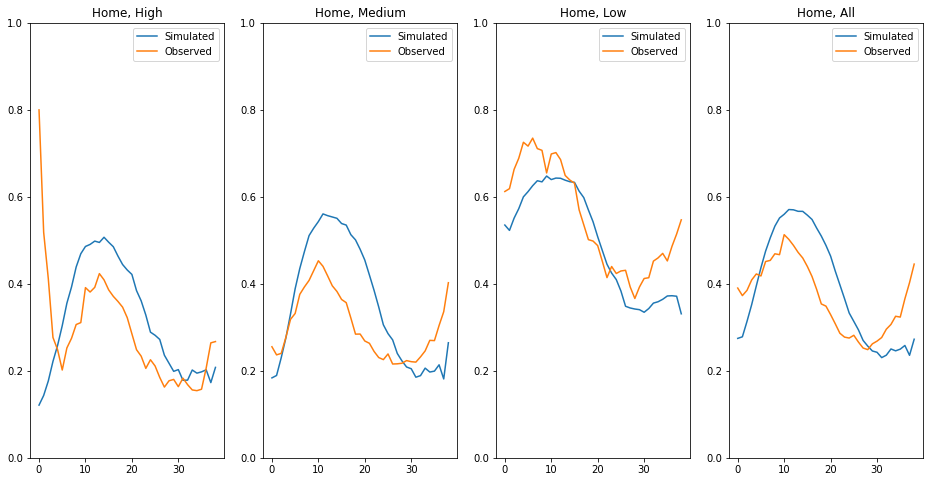

In [6]:
plot_basics_choices(df_sim=df_sim_start, df_obs=df_obs)

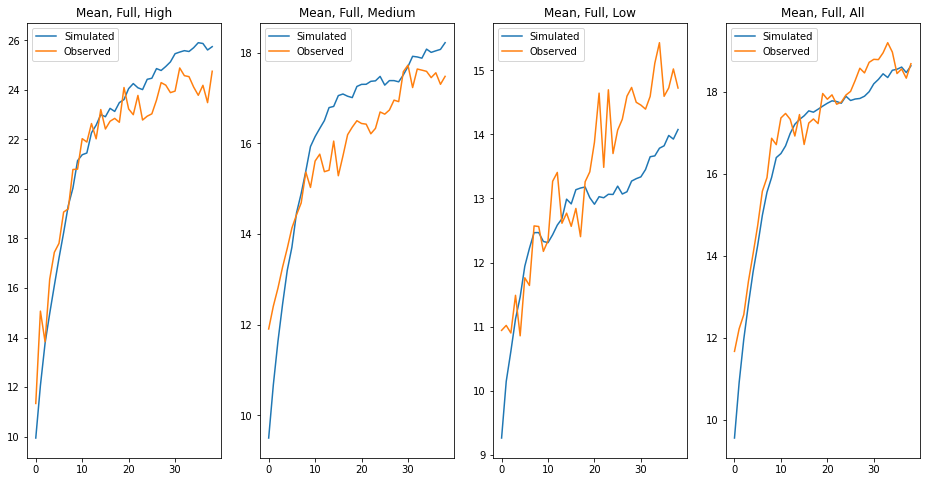

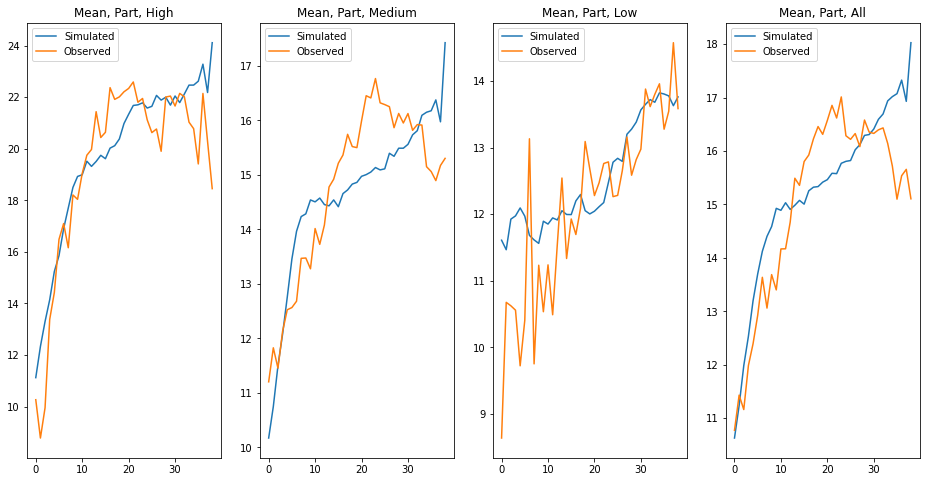

In [7]:
plot_basics_wages(df_sim=df_sim_start, df_obs=df_obs)